<a href="https://colab.research.google.com/github/MustiCankan/SpiriteAI/blob/main/flux_realistic_lastdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U diffusers transformers accelerate torch torchvision

In [13]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16)
pipe.load_lora_weights("strangerzonehf/Realism-v3-Flux", weight_name="Realism-v3.safetensors")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe.to(device)

# Enable memory optimizations.
pipe.enable_model_cpu_offload()

prompt = "Blonde hair lady holding a coffee in the beach,realistic,8k"
image = pipe(
    prompt,
    guidance_scale=3.5,
    num_inference_steps=28,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image.save("flux-schnell.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Realism-v3.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [15]:
prompt = "brunette instagram model. Short lob haircut. Selfie Photo is taken with an iPhone 15. Perfect face and body. She is twenty years old, realistic candid photo, realistic natural skin with flaws, very pretty. Wearing high socks. She is standing in a staged apartment with decor. She is wearing a cardigan and high waisted slouchy jeansSee less"
image = pipe(
    prompt,
    guidance_scale=3.5,
    num_inference_steps=28,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]

image.save("flux-schnell.png")


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

(-0.5, 1023.5, 1023.5, -0.5)

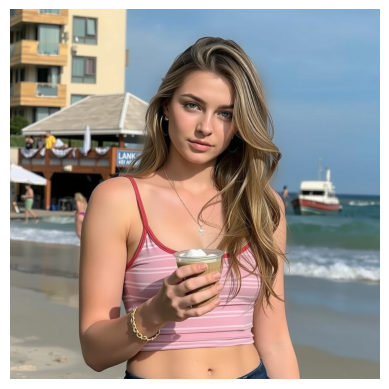

In [9]:
import matplotlib.pyplot as plt

prompt = "Blonde hair lady holding a coffee in the beach,realistic,8k"
image = pipe(
    prompt,
    guidance_scale=3.5,
    num_inference_steps=28,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(2434)
).images[0]


plt.imshow(image)
plt.axis('off')

Token indices sequence length is longer than the specified maximum sequence length for this model (135 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["with the themes of isolation and mystery. the intricate details of the flowers and birds contrast beautifully against the soft background, enhancing the portrait's dreamlike quality. this award - winning photography captures the essence of emotional depth and artistic vision, inviting viewers to explore the unsettling beauty of the scene."]


  0%|          | 0/40 [00:00<?, ?it/s]

(-0.5, 1023.5, 1023.5, -0.5)

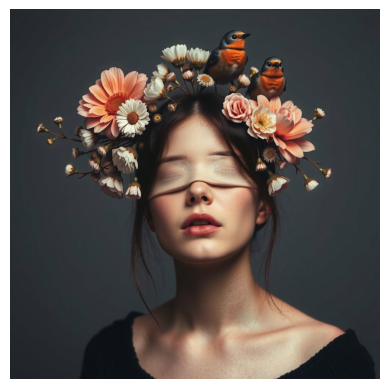

In [14]:
import matplotlib.pyplot as plt

prompt = "A haunting portrait of a woman with her eyes blindfolded, adorned with an intricate arrangement of flowers and birds perched on her head, styled in the evocative manner of Vincent van Gogh. The composition embraces surrealism with soft, muted tones that blend cohesively, creating an eerie and minimalistic atmosphere. The overall feeling is both weird and dark, invoking gothic elements that resonate with the themes of isolation and mystery. The intricate details of the flowers and birds contrast beautifully against the soft background, enhancing the portrait's dreamlike quality. This award-winning photography captures the essence of emotional depth and artistic vision, inviting viewers to explore the unsettling beauty of the scene."
image = pipe(
    prompt,
    guidance_scale=3.5,
    num_inference_steps=40,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(2434)
).images[0]


plt.imshow(image)
plt.axis('off')

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["with the themes of isolation and mystery. the intricate details of the flowers and birds contrast beautifully against the soft background, enhancing the portrait's dreamlike quality. this award - winning photography captures the essence of emotional depth and artistic vision, inviting viewers to explore the unsettling beauty of the scene. dreamlike seen with iridescent lights dancing across her face, capturing a serene and ethereal glow. ultra realistic, 8 k"]


  0%|          | 0/40 [00:00<?, ?it/s]

(-0.5, 1023.5, 1023.5, -0.5)

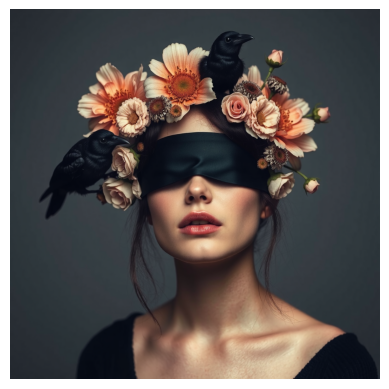

In [17]:
import matplotlib.pyplot as plt

prompt = "A haunting portrait of a woman with her eyes blindfolded, adorned with an intricate arrangement of flowers and crows perched on her head, styled in the evocative manner of Vincent van Gogh. The composition embraces surrealism with soft, muted tones that blend cohesively, creating an eerie and minimalistic atmosphere. The overall feeling is both weird and dark, invoking gothic elements that resonate with the themes of isolation and mystery. The intricate details of the flowers and birds contrast beautifully against the soft background, enhancing the portrait's dreamlike quality. This award-winning photography captures the essence of emotional depth and artistic vision, inviting viewers to explore the unsettling beauty of the scene. Dreamlike seen with iridescent lights dancing across her face, capturing a serene and ethereal glow. Ultra realistic, 8K"
image = pipe(
    prompt,
    guidance_scale=3.5,
    num_inference_steps=40,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(2434)
).images[0]


plt.imshow(image)
plt.axis('off')

In [18]:
image.save("mirav1.png")